In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import mcubes
from scipy.interpolate import RegularGridInterpolator

In [3]:
root_dir = os.getcwd()
sys.path.append(root_dir)

In [4]:
from orbitals import datatypes, definitions, electron_functions, tools, analysis, visualisation

In [138]:
resolution = {"x": 20, "y": 20, "z": 20}
wavefunction = datatypes.CartesianWavefunction.new_1e_atomic_wavefunction(
    resolution=resolution,
    r_max=0.5,
    n=1, l=0, m=0
)

In [139]:
wavefunction.eval_wavefunction()

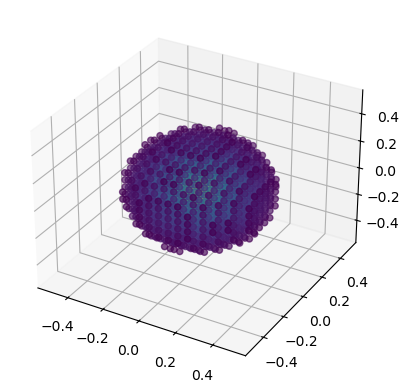

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [140]:
visualisation.plot_clipped_points(
    wavefunction, 
    threshold=0.3,
)


(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

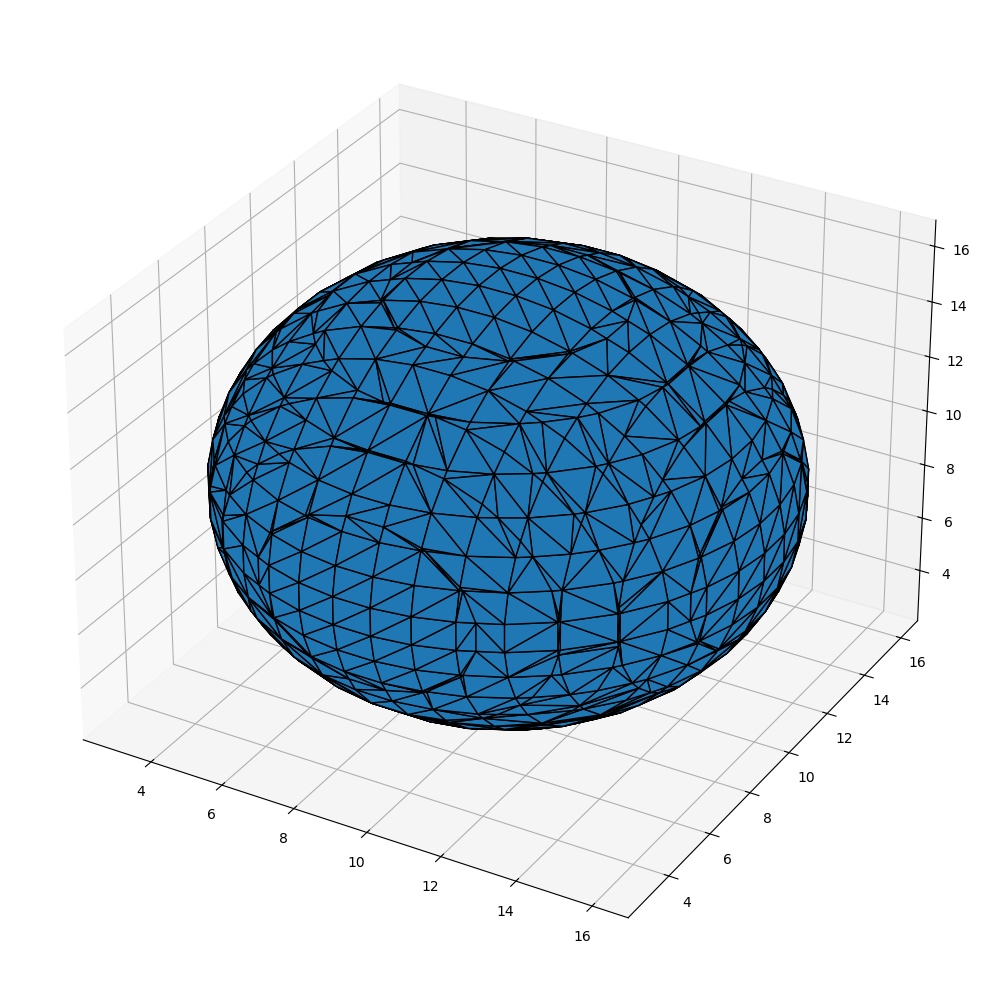

In [146]:
visualisation.plot_isosurface(
    wavefunction, 
    relative_threshold=0.3,
)

In [46]:
cartesianwavefunction = datatypes.CartesianWavefunction.new_1e_atomic_wavefunction(resolution={'x': 25, 'y': 25, 'z': 25}, r_max=2,  n=2, l=1, m=0)

In [37]:
resolution = {"r": 100, "theta": 100, "phi": 100}
density = datatypes.RadialWavefunction.new_1e_atomic_wavefunction(
    resolution=resolution,
    r_max=5,
    n=1, l=0, m=0
)

In [47]:
cartesianwavefunction.eval_wavefunction()

/Users/patrickrowe/Documents/Code/Python/orbitals/orbitals/tools.py:49: RuntimeWarning: invalid value encountered in scalar divide
  phi = np.arccos(z / r)
/Users/patrickrowe/Documents/Code/Python/orbitals/orbitals/datatypes.py:23: RuntimeWarning: invalid value encountered in divide
  self.wavefunction.data /= np.sum(np.abs(self.wavefunction.data))


ValueError: 'c' argument has 125 elements, which is inconsistent with 'x' and 'y' with size 1000000.

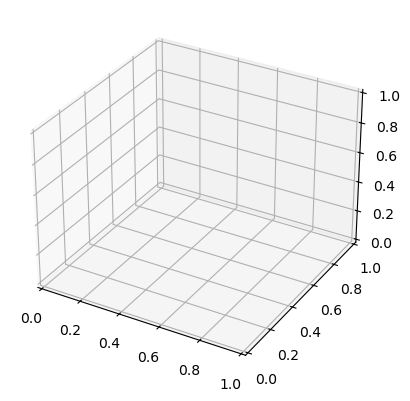

In [50]:
# plot with matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xx, yy, zz = density.meshgrid_coords()

ax.scatter3D(xs=xx, ys=yy, zs=zz, c=plot_density)

plt.show()



/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/skimage/measure/_marching_cubes_lewiner.py:178: ComplexWarning: Casting complex values to real discards the imaginary part
  level = float(level)


(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

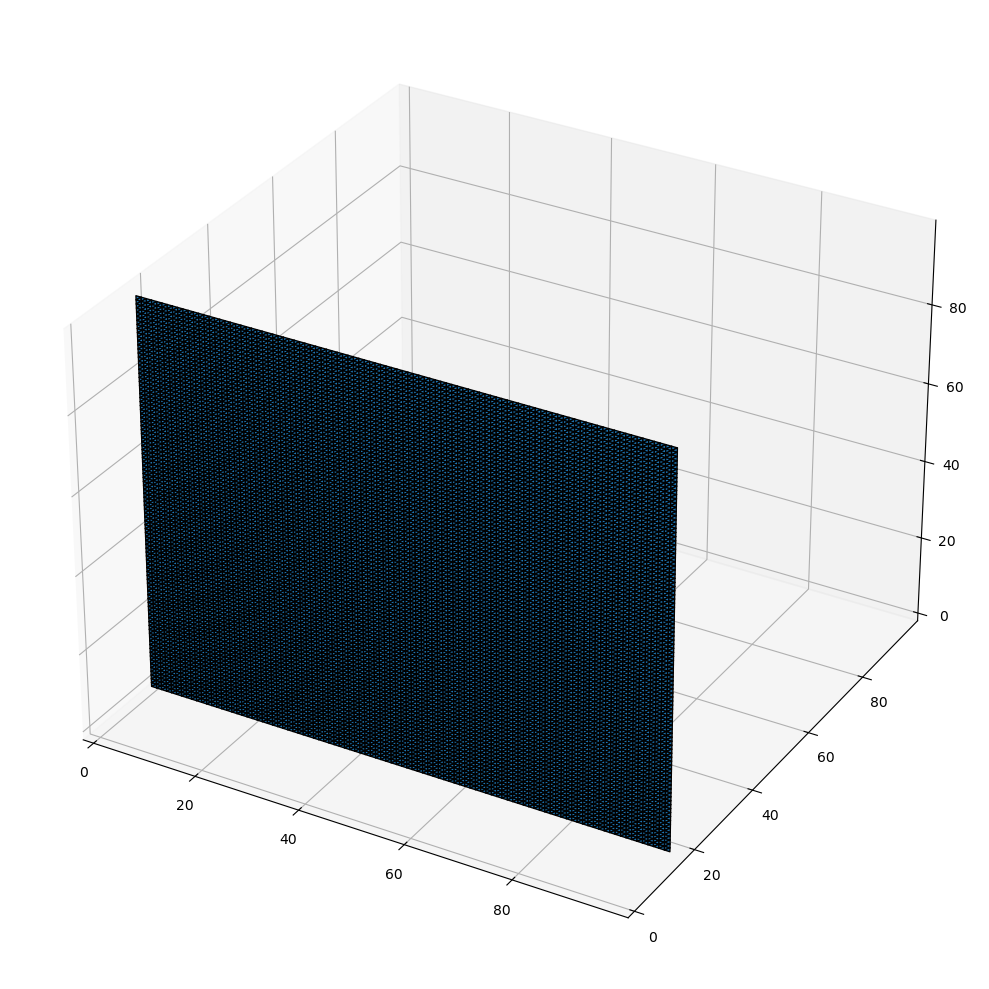

In [49]:
visualisation.plot_isosurface(
    density, 
    relative_threshold=0.1,
)

In [31]:
[(x, y, z) for x, y, z in zip(
        cartesianwavefunction.get_coords()['x'].data,
        cartesianwavefunction.get_coords()['y'].data,
        cartesianwavefunction.get_coords()['z'].data,
    )
]

[(-2.0, -2.0, -2.0),
 (-1.8333333333333333, -1.8333333333333333, -1.8333333333333333),
 (-1.6666666666666667, -1.6666666666666667, -1.6666666666666667),
 (-1.5, -1.5, -1.5),
 (-1.3333333333333335, -1.3333333333333335, -1.3333333333333335),
 (-1.1666666666666667, -1.1666666666666667, -1.1666666666666667),
 (-1.0, -1.0, -1.0),
 (-0.8333333333333335, -0.8333333333333335, -0.8333333333333335),
 (-0.6666666666666667, -0.6666666666666667, -0.6666666666666667),
 (-0.5, -0.5, -0.5),
 (-0.3333333333333335, -0.3333333333333335, -0.3333333333333335),
 (-0.16666666666666674, -0.16666666666666674, -0.16666666666666674),
 (0.0, 0.0, 0.0),
 (0.16666666666666652, 0.16666666666666652, 0.16666666666666652),
 (0.33333333333333304, 0.33333333333333304, 0.33333333333333304),
 (0.5, 0.5, 0.5),
 (0.6666666666666665, 0.6666666666666665, 0.6666666666666665),
 (0.833333333333333, 0.833333333333333, 0.833333333333333),
 (1.0, 1.0, 1.0),
 (1.1666666666666665, 1.1666666666666665, 1.1666666666666665),
 (1.333333333

In [32]:
relative_threshold = 0.8

density = cartesianwavefunction.get_density()
dens_range = np.nanmax(density) - np.nanmin(density)
abs_threshold = relative_threshold * dens_range

verts, faces, normals, values = ski.measure.marching_cubes(
    volume=density, 
    level=abs_threshold, 
)

In [33]:
verts

array([[ 8.964347 ,  5.       , 10.       ],
       [ 9.       ,  5.       ,  9.765549 ],
       [ 9.       ,  4.8392487, 10.       ],
       ...,
       [15.146533 , 19.       , 12.       ],
       [15.119805 , 19.       , 13.       ],
       [15.035653 , 19.       , 14.       ]], dtype=float32)

NameError: name 'verts' is not defined

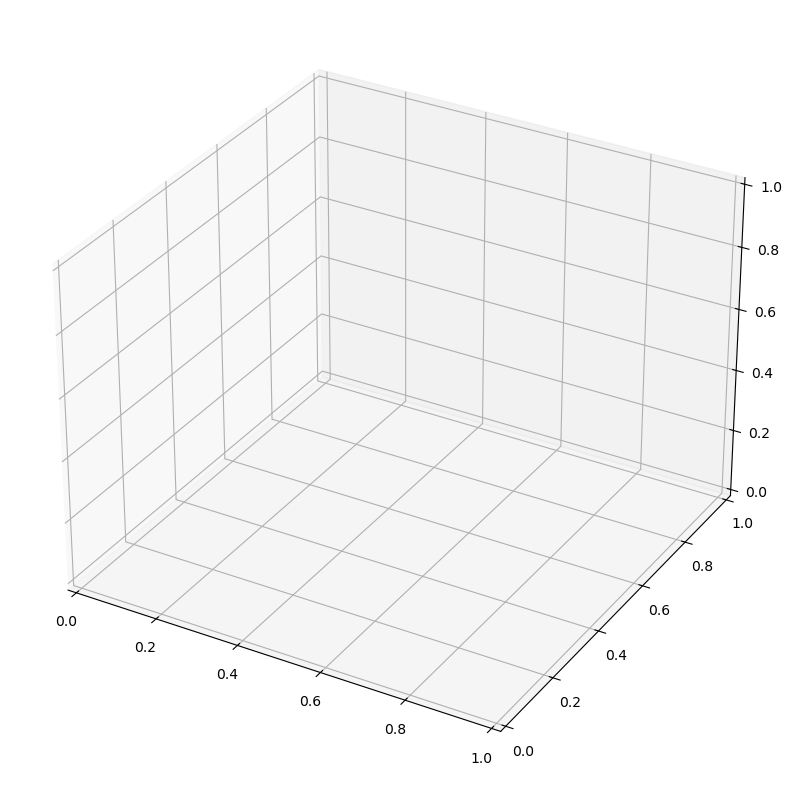

In [51]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(verts.min(), verts.max())
ax.set_ylim(verts.min(), verts.max())
ax.set_zlim(verts.min(), verts.max())

plt.tight_layout()
plt.show()

In [35]:
interp = RegularGridInterpolator(
    (
     cartesianwavefunction.get_coords()['x'].data,
     cartesianwavefunction.get_coords()['y'].data,
     cartesianwavefunction.get_coords()['z'].data,
    ),
    density
)

In [52]:
highrescartesian = datatypes.CartesianWavefunction(resolution={'x': 50, 'y': 50, 'z': 50}, r_max=2)

TypeError: CartesianWavefunction.__init__() missing 1 required positional argument: 'wavefunction'

In [53]:
xx, yy, zz = highrescartesian.meshgrid_coords()

NameError: name 'highrescartesian' is not defined

In [54]:
highrescartesian.wavefunction.data = interp((xx, yy, zz))

NameError: name 'interp' is not defined

In [55]:
new_highrescartesian = tools.interpolate_grid_function(cartesianwavefunction, new_resolution={'x': 50, 'y': 50, 'z': 50})

In [56]:
plot_density = tools.clip_density(new_highrescartesian, 0.5)

/Users/patrickrowe/Documents/Code/Python/orbitals/orbitals/tools.py:69: RuntimeWarning: All-NaN slice encountered
  dens_range = np.nanmax(electron_density) - np.nanmin(electron_density)


NameError: name 'highrescartesian' is not defined

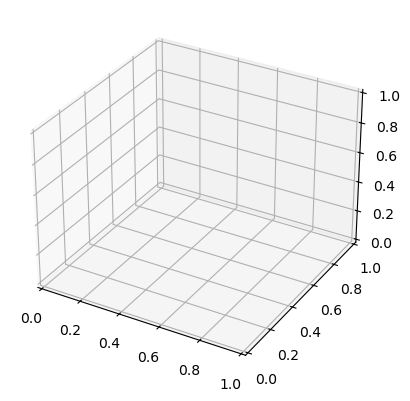

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xx, yy, zz = highrescartesian.meshgrid_coords()

ax.scatter3D(xs=xx, ys=yy, zs=zz, c=plot_density)

plt.show()

(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

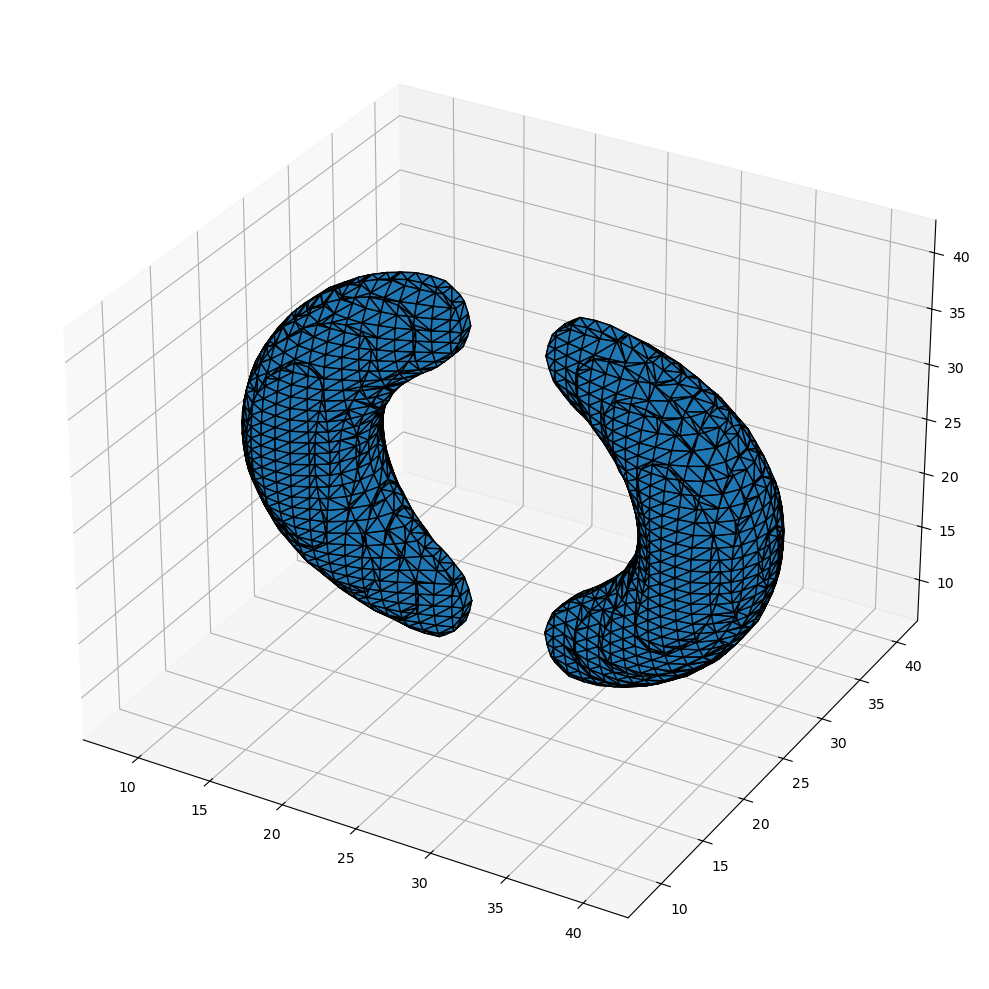

In [46]:
visualisation.plot_isosurface(new_highrescartesian, 0.9)

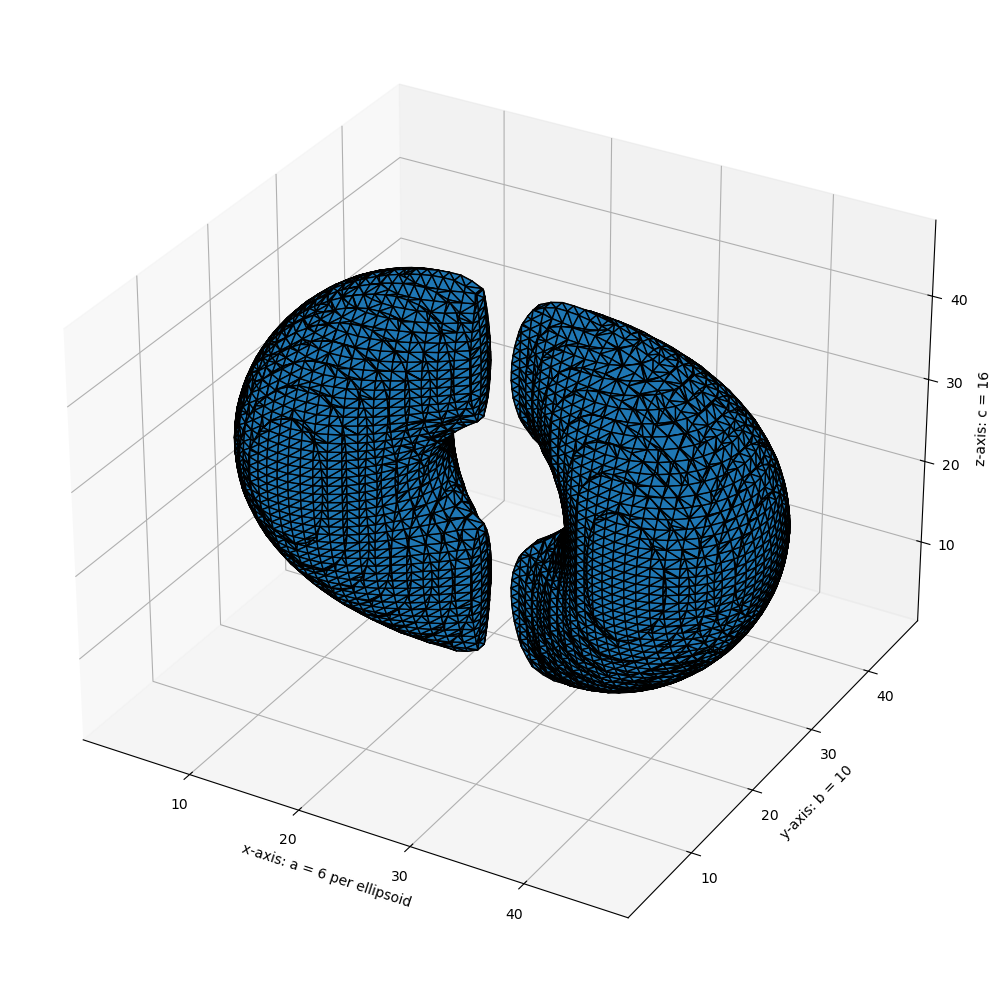

In [37]:
relative_threshold = 0.65

density = highrescartesian.get_density()
dens_range = np.nanmax(density) - np.nanmin(density)
abs_threshold = relative_threshold * dens_range

verts, faces, normals, values = ski.measure.marching_cubes(
    volume=density, 
    level=abs_threshold, 
)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(verts.min(), verts.max())
ax.set_ylim(verts.min(), verts.max())
ax.set_zlim(verts.min(), verts.max())

plt.tight_layout()
plt.show()